<a href="https://colab.research.google.com/github/ajaythakur3369/The-Sparks-Foundation-Internship/blob/main/Unsupervised_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Unsupervised Classification**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - The Sparks Foundation**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/The-Sparks-Foundation-Internship)**

# **Problem Statement -**

**Objective -** To predict the optimum number of clusters from the given 'Iris' dataset and represent it visually, you can use R or Python.


# **General Guidelines -**

Task submission:

1. Host the code on a GitHub Repository (public), record the code and output in a video, and post the video on YouTube.

2. Share the links of the code (GitHub) and video (YouTube) as a post on your LinkedIn profile, not TSF Network.

3. Submit the LinkedIn link in the Task Submission Form when shared.

4. Please refer to the FAQs on how to submit the tasks.


# **Let's Begin !**

### **Import Libraries**

In [ ]:
# Imported all necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### **Reading the dataset**

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Exploring the data and checking for null values**

In [ ]:
# Checking the null values
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


### **Displaying all the columns and their data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.shape

(150, 4)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Checking for missing values**

In [ ]:
df.isnull().sum().sort_values(ascending = False)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### **Checking for duplicate values**

In [ ]:
df.duplicated().sum()

1

### **Drop the duplicate values**

In [ ]:
df.drop_duplicates(inplace = True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df.shape

(149, 4)

### **Checking for outliers**

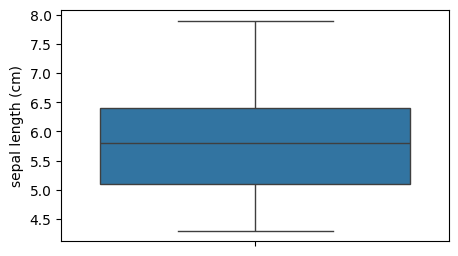

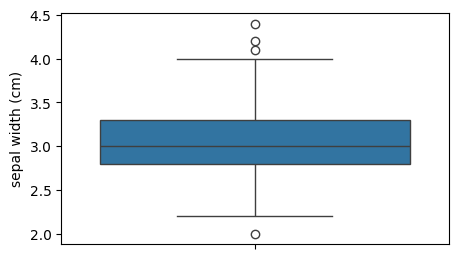

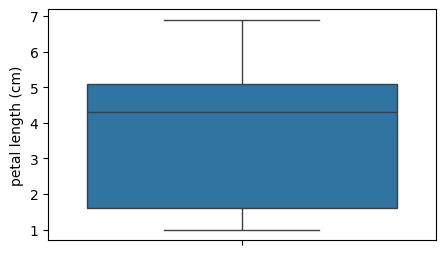

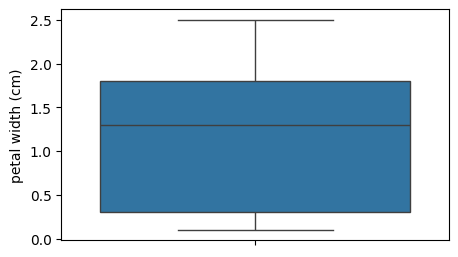

In [ ]:
for i in df.columns:
    if df[i].dtype == 'float64':
        plt.figure(figsize = (5, 3))
        sns.boxplot(df[i])
        plt.show()

### **Targeting the Outliers**

In [ ]:
Q1, Q3 = np.percentile(df['sepal width (cm)'], [25, 75])

IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

df = df[(df['sepal width (cm)'] >= lower) & (df['sepal width (cm)'] <= upper)]
df.shape

(145, 4)

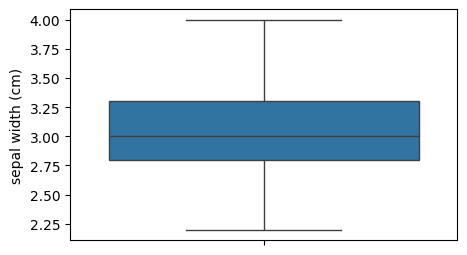

In [ ]:
# Boxplot for sepal width (cm) after outlier treatment
plt.figure(figsize = (5, 3))
sns.boxplot(y = df['sepal width (cm)'])
plt.show()

### **Correlation Matrix**

In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.123866,0.881381,0.825321
sepal width (cm),-0.123866,1.000000,-0.403554,-0.337080
petal length (cm),0.881381,-0.403554,1.000000,0.961776
petal width (cm),0.825321,-0.337080,0.961776,1.000000


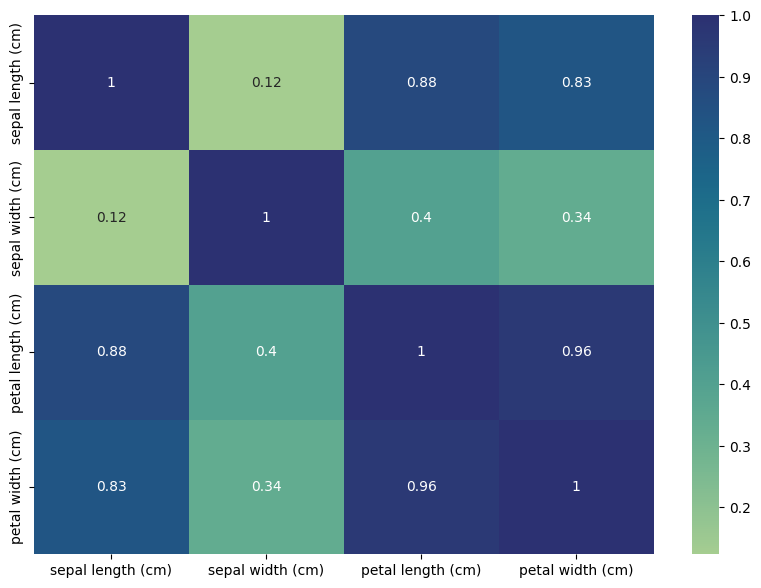

In [ ]:
plt.figure(figsize = (10, 7))
sns.heatmap(abs(df.corr()), cmap = 'crest', annot = True)
plt.show()

### **Find the optimum number of clusters (K)**

In [ ]:
# Creating X to place into clusters
x = df.iloc[:, [0, 1, 2, 3]].values

# Defining and plotting the elbow method
# Function to calculate WCSS (Within-Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

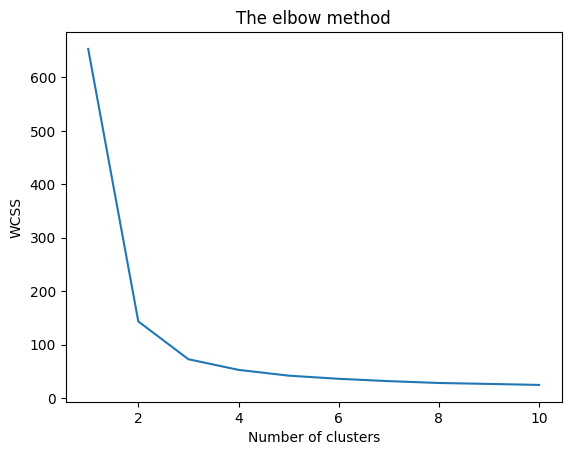

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### **Applying KMeans to the dataset or creating the KMeans classifier**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### **Visualizing the clusters on the first two columns**

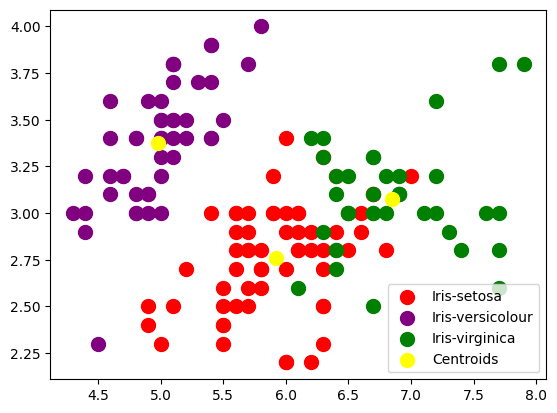

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

### **Plotting the centroids of the clusters**

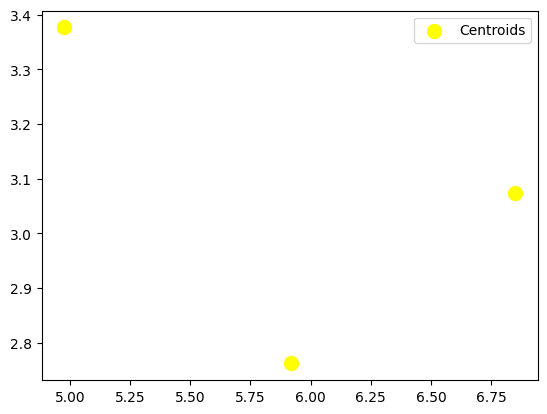

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
df['cluster'] = kmeans.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


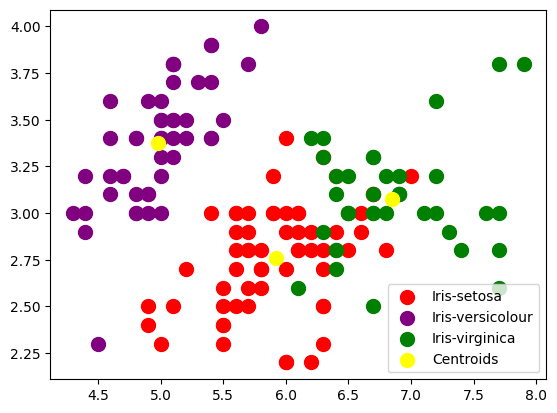

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

### **Hence, we have successfully predicted the optimum number of clusters and represented it visually.**